In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

transactions = pd.read_csv('HW1 clv_transactions.csv', index_col = 'TransactionDate')
#To check if data has any missing values
if transactions.isnull().values.any():
    print('Data has missing values')
else:
    print('Data has no missing values')

#To find the range of Transaction Dates
print('Range of transaction dates: '+ transactions.index.min() + ' - ' + transactions.index.max())

#To find the no. of unique customers
print('The no. of unique customers: '+ str(transactions['CustomerID'].nunique()))

#To find the descriptive statistics on the dataset
amount = transactions['Amount']
print('*** Descriptive Statistics for Amount ***')
print('Min: ' + str(amount.min()))
print('Max: ' + str(amount.max()))
print('Variance: ' + str(amount.var()))
print('Standard Deviation: ' + str(amount.std()))
print('****************************')

#To check if transaction amount has increased over time due to inflation
amount.plot(kind = 'line')
plt.show()

Data has no missing values
Range of transaction dates: 1/1/2011 - 9/9/2015
The no. of unique customers: 1000
*** Descriptive Statistics for Amount ***
Min: -1.0
Max: 2033.0
Variance: 1499.5411107517461
Standard Deviation: 38.72390877418945
****************************


<Figure size 640x480 with 1 Axes>

In [2]:
#Display outliers
print(transactions[~(np.abs(transactions.Amount- transactions.Amount.mean()) <= (3*transactions.Amount.std()))])
print(transactions[~(np.abs(transactions.CustomerID- transactions.CustomerID.mean()) <= (3*transactions.CustomerID.std()))])
print(transactions[~(np.abs(transactions.TransactionID- transactions.TransactionID.mean()) <= (3*transactions.TransactionID.std()))])

#Remove the Amount outliers
cleaned_transactions = transactions[np.abs(transactions.Amount- transactions.Amount.mean()) <= (3*transactions.Amount.std())]
print(cleaned_transactions)


                 TransactionID  CustomerID  Amount
TransactionDate                                   
10/7/2011                   24           7  1003.0
5/14/2014                  212          54  1027.0
8/13/2012                 4178        1000  2033.0
Empty DataFrame
Columns: [TransactionID, CustomerID, Amount]
Index: []
Empty DataFrame
Columns: [TransactionID, CustomerID, Amount]
Index: []
                 TransactionID  CustomerID  Amount
TransactionDate                                   
9/4/2012                     1           1   20.26
5/15/2012                    2           2   10.87
5/23/2014                    3           2    2.21
10/24/2014                   4           2   10.48
10/13/2012                   5           2    3.94
1/23/2013                    6           2   12.37
3/9/2014                     7           2    1.59
11/17/2013                   8           2    2.75
10/10/2014                   9           2    3.51
11/26/2012                  10           3

In [3]:
cleaned_transactions = cleaned_transactions.set_index(pd.to_datetime(cleaned_transactions.index))
cleaned_transactions['TransactionYear'] = cleaned_transactions.index.year

#Sorted the transaction data according to dates

cleaned_transactions = cleaned_transactions.sort_index()
cust_map = pd.DataFrame()

cust_map = cleaned_transactions.groupby('CustomerID').first()

cleaned_transactions['Origin'] = 0
#print(cust_map)

cleaned_transactions['Origin'] = cleaned_transactions['CustomerID'].apply(lambda x: int(cust_map.loc[x].TransactionYear))
cleaned_transactions = cleaned_transactions.drop(columns = 'TransactionYear')    
print(cleaned_transactions)

                 TransactionID  CustomerID  Amount  Origin
TransactionDate                                           
2010-01-04                1737         429    3.27    2010
2010-01-05                 817         211    0.67    2010
2010-01-07                1257         322   13.02    2010
2010-01-09                3288         802   14.21    2010
2010-01-09                2628         660    4.34    2010
2010-01-13                2543         644    0.26    2010
2010-01-17                3588         870    8.27    2010
2010-01-18                1683         415   23.18    2010
2010-01-26                3603         874    0.69    2010
2010-01-28                2246         569   27.85    2010
2010-01-30                2978         727    1.28    2010
2010-01-31                3348         816   15.04    2010
2010-02-03                2611         655    6.97    2010
2010-02-03                 489         117    1.08    2010
2010-02-04                  29           9    0.74    20

In [4]:
#The dataframe to store the actual transaction amt per age
new = pd.DataFrame()


#Setting up conditions for each transaction period
cond1 = pd.DatetimeIndex(cleaned_transactions.index).year - cleaned_transactions['Origin'] < 1
cond2 = pd.DatetimeIndex(cleaned_transactions.index).year - cleaned_transactions['Origin'] < 2
cond3 = pd.DatetimeIndex(cleaned_transactions.index).year - cleaned_transactions['Origin'] < 3
cond4 = pd.DatetimeIndex(cleaned_transactions.index).year - cleaned_transactions['Origin'] < 4
cond5 = pd.DatetimeIndex(cleaned_transactions.index).year - cleaned_transactions['Origin'] < 5
cond6 = pd.DatetimeIndex(cleaned_transactions.index).year - cleaned_transactions['Origin'] < 6


#Extracting the year and assigning it to the appropriate group
new['12'] = cleaned_transactions[cond1].groupby('Origin').sum()['Amount']
new['24'] = cleaned_transactions[cond2].groupby('Origin').sum()['Amount']
new['36'] = cleaned_transactions[cond3].groupby('Origin').sum()['Amount']
new['48'] = cleaned_transactions[cond4].groupby('Origin').sum()['Amount']
new['60'] = cleaned_transactions[cond5].groupby('Origin').sum()['Amount']
new['72'] = cleaned_transactions[cond6].groupby('Origin').sum()['Amount']

#To replace redundant equal data with nan
is_duplicate = new.apply(pd.Series.duplicated, axis=1)
new_display = new.where(~is_duplicate, np.nan)

#To display two decimal places
pd.options.display.float_format = '{:.2f}'.format

#To display replace nan with empty space 
print(new_display.replace(np.nan,' '))





            12      24      36      48      60      72
Origin                                                
2010   2259.67 3614.78 5274.81 6632.37 7930.69 8964.49
2011   2238.46 3756.90 5464.99 6702.11 7861.24        
2012   2181.35 3874.69 5226.86 6501.85                
2013   2179.85 3608.81 5226.75                        
2014   1830.85 3262.05                                
2015   1912.17                                        


In [5]:
#The dataframe to store the actual aquisition per origin
no_of_cust = pd.DataFrame()

#Keeping only first transaction from each customer id to count the no of customers
no_of_cust = cleaned_transactions.drop_duplicates(['CustomerID'], keep ='first')

#Assigning the value to all age groups as the count is age independent 
no_of_cust = no_of_cust.groupby('Origin').count()
no_of_cust['12'] =  no_of_cust['CustomerID']
no_of_cust['24'] =  no_of_cust['CustomerID']
no_of_cust['36'] =  no_of_cust['CustomerID']
no_of_cust['48'] =  no_of_cust['CustomerID']
no_of_cust['60'] =  no_of_cust['CustomerID']
no_of_cust['72'] =  no_of_cust['CustomerID']

no_of_cust = no_of_cust.drop(['TransactionID', 'CustomerID', 'Amount'], axis = 1)

print(no_of_cust)

         12   24   36   48   60   72
Origin                              
2010    172  172  172  172  172  172
2011    170  170  170  170  170  170
2012    163  163  163  163  163  163
2013    180  180  180  180  180  180
2014    155  155  155  155  155  155
2015    160  160  160  160  160  160


          12    24    36    48    60    72
Origin                                    
2010   13.14 21.02 30.67 38.56 46.11 52.12
2011   13.17 22.10 32.15 39.42 46.24      
2012   13.38 23.77 32.07 39.89            
2013   12.11 20.05 29.04                  
2014   11.81 21.05                        
2015   11.95                              


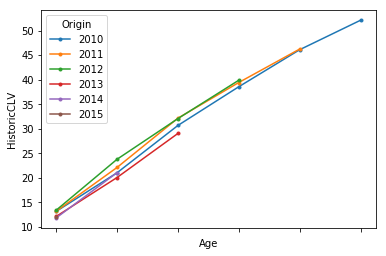

     HistoricCLV
Age             
12         12.60
24         20.03
36         26.37
48         30.24
60         32.69
72         33.73


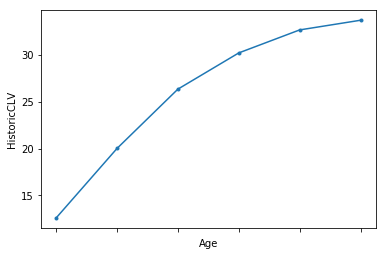

In [6]:
#Calculate historic clv by using the above two data frames
historic_clv = new_display/no_of_cust

#Replace Nan before printing
print(historic_clv.replace(np.nan,' '))

#Plotting the Historic CLV data for each origin 
plot_clv = historic_clv.transpose()
fig,ax = plt.subplots()
plot_clv.plot(style='.-', kind='line', ax = ax)
plt.xlabel('Age')
plt.ylabel('HistoricCLV')
plt.show()

#Calculate the weighted avg CLV
cumulative_clv = new.sum()/no_of_cust.sum()
df_cumulative_clv = pd.DataFrame({'Age':cumulative_clv.index, 'HistoricCLV':cumulative_clv.values})
df_cumulative_clv = df_cumulative_clv.set_index('Age')
print(df_cumulative_clv)

#Plotting the weighted avg CLV
cumulative_clv.plot(style='.-', kind='line')
plt.xlabel('Age')
plt.ylabel('HistoricCLV')
plt.show()




In [7]:


#Customers aquired in 2011
#Amount spent by customers aquired in 2011
maxAmt = new.max(axis=1)
maxCLV = historic_clv.max(axis=1)
print("Customers with origin 2011 have spent " + str(maxAmt[2011]) )
print("Max Historic CLV at 2011 " + str(maxCLV[2011]) )

#As can be seen above weighted avg historic CLV graph: with increase in age the avg weighted historic CLV value is increasing
#For all year origins there is an upward trend with age noticed as can be seen from the graphs above

Customers with origin 2011 have spent 7861.240000000003
Max Historic CLV at 2011 46.242588235294136
